<a href="https://colab.research.google.com/github/Pallav-Lama/deeplearning-projects/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#importing dataset
dataset = pd.read_csv("/content/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.Surname.unique().shape

(2932,)

In [ ]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
geography = pd.get_dummies(X["Geography"], drop_first = True)
gender = pd.get_dummies(X["Gender"], drop_first = True)

In [ ]:
X = pd.concat([X, geography, gender], axis = 1)

In [ ]:
X.drop(["Geography", "Gender"], inplace = True, axis = 1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [ ]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Implemening ANN

In [ ]:
#importing Keras Libraries and packaging
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [ ]:
#initializing the ANN
classifier = Sequential()

In [ ]:
#Adding the input and first hidden layer
classifier.add(Dense(units=6, kernel_initializer = "he_uniform", activation = 'relu', input_dim = 11))

In [ ]:
#Adding the output layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation="relu"))

In [ ]:
#Adding the output layer
classifier.add(Dense(units=1, kernel_initializer="glorot_uniform", activation="sigmoid"))

In [ ]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [ ]:
#fitting the ANN to the training set
model_history = classifier.fit(X_train, y_train, validation_split= 0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 5s 5ms/step - loss: 0.5260 - accuracy: 0.7822 - val_loss: 0.4779 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4573 - accuracy: 0.7960 - val_loss: 0.4569 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4398 - accuracy: 0.7979 - val_loss: 0.4471 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4317 - accuracy: 0.8035 - val_loss: 0.4422 - val_accuracy: 0.8069
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4264 - accuracy: 0.8166 - val_loss: 0.4380 - val_accuracy: 0.8114
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4220 - accuracy: 0.8181 - val_loss: 0.4362 - val_accuracy: 0.8076
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4183 - accuracy: 0.8229 - val_loss: 0.4328 - val_accuracy: 0.8080

In [ ]:
#list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


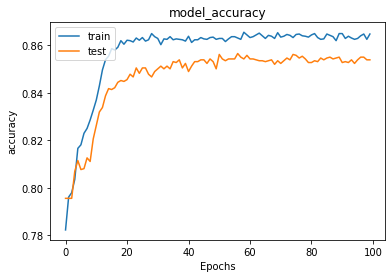

In [ ]:
#summerize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model_accuracy")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# Predicting and evaluating the model

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred, y_test)
ac = accuracy_score(y_pred, y_test)
print(cm)
print(ac)

[[1485  187]
 [ 110  218]]
0.8515
